In [226]:
import scipy 
import numpy as np
from scipy.stats import binom
from scipy.stats import gamma
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [385]:
plt.style.use("seaborn-darkgrid")

### Manual plotting
Plottet is the probability to leave over time with probability to leave 0.08% / hour

In [288]:
time = np.linspace(0, 10000, num=1000)
my_array = np.zeros(0)
for t in time:
    prob = binom.pmf(k=1, n=t, p=0.0008)
    my_array = np.append(my_array, prob)

Text(0, 0.5, 'Probability')

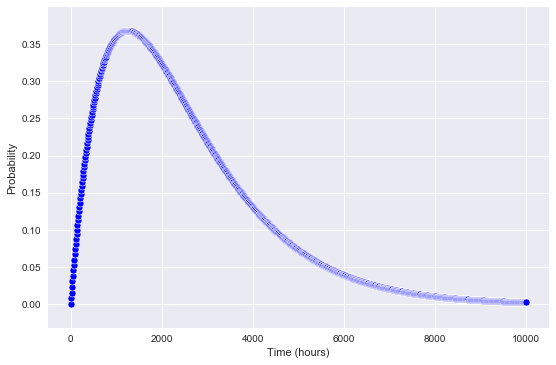

In [334]:
sns.scatterplot(x=time, y=my_array, color="blue", alpha=1)
plt.xlabel("Time (hours)")
plt.ylabel("Probability")

## Gamma Distribution to determine the mean residence time + CI

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

The Gamma distribution is a continuous, positive-only, unimodal distribution that encodes 
the time required for «alpha» events to occur in a Poisson process with mean arrival time of «beta».

#Gamma distribution has two parameteres alpha and beta.
alpha = 1 (gamma with an alpha of one is reduced to exponential function)
scale = rate = (1/beta)

#### Before Treatment

In [228]:
a1 = 1 # for one cell
rate1= 1/0.0008 # rate is 1/beta 

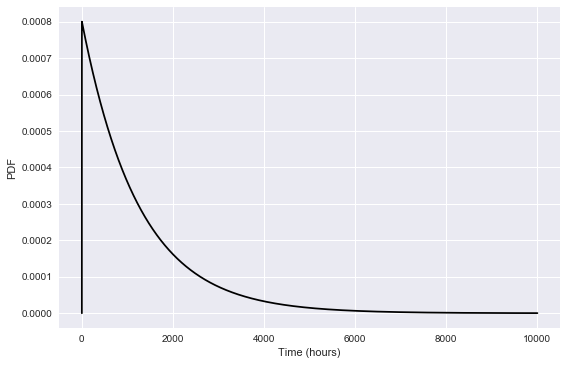

In [335]:
#Plot the probability distribution function
time1 = np.linspace(0, 10000, num=10000)
y1_pdf = gamma.pdf(time1, a=a1, loc=1, scale=rate1)
plt.xlabel("Time (hours)")
plt.ylabel("PDF")
plt.plot(time1, y1_pdf, color="black")

In [241]:
#Calculate statistics
print("Report:")
print("Mean:", gamma.mean(a1, loc=0, scale=rate1))
print("Median:", gamma.median(a1, loc=0, scale=rate1))
print("StD:", gamma.std(a1, loc=0, scale=rate1))
print("Var:", gamma.var(a1, loc=0, scale=rate1))
print("Intervals (90%):", gamma.interval([0.9], a1, loc=0, scale=rate1))

Report:
Mean: 1250.0
Median: 866.4339756999319
StD: 1250.0
Var: 1562500.0
Intervals (90%): (array([64.11661798]), array([3744.66534194]))


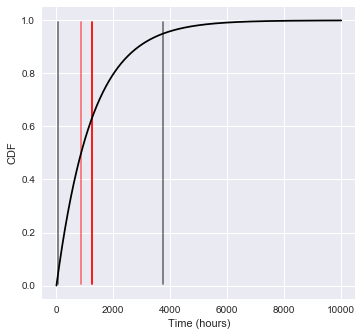

In [343]:
#Cumulative distribution function
plt.figure(figsize=(5, 5))
y1_cdf = gamma.cdf(time1, a1, loc=0, scale=rate1)
plt.axvline(1250.0, 0.05,0.95, color="red") # Mean
plt.axvline(866.43, 0.05,0.95, color="red", alpha=0.5) # Median
plt.axvline(64.12, 0.05,0.95, color="black", alpha=0.5) # CI, lower 
plt.axvline(3744.67, 0.05,0.95, color="black", alpha=0.5) # CI, upper
plt.xlabel("Time (hours)")
plt.ylabel("CDF")
plt.plot(time1, y1_cdf, color="black")

In [382]:
# #Fig for manuscript (Time in days)

# plt.figure(figsize=(5, 5))
# y1_cdf = gamma.cdf(time1, a1, loc=0, scale=rate1)
# plt.axvline(1250.0/24, 0.01,0.99, color="red") # Mean
# plt.axvline(866.43/24, 0.01,0.99, color="red", alpha=0.5) # Median
# plt.axvline(64.12/24, 0.01,0.99, color="black", alpha=0.5) # CI, lower 
# plt.axvline(3744.67/24, 0.01,0.99, color="black", alpha=0.5) # CI, upper
# plt.xlabel("Time (days)")
# plt.ylabel("CDF")
# plt.plot(time1/24, y1_cdf, color="black")
# plt.tight_layout()
# plt.minorticks_on()
# plt.axis([-10, 400, 0, 1.1])
# plt.savefig('CDF_before.svg', transparent=True)

In [383]:
# #Calculate statistics in days
# print("Report:")
# print("Mean:", gamma.mean(a1, loc=0, scale=rate1)/24)
# print("Median:", gamma.median(a1, loc=0, scale=rate1)/24)
# print("StD:", gamma.std(a1, loc=0, scale=rate1)/24)
# print("Var:", gamma.var(a1, loc=0, scale=rate1)/24)
# print("Intervals (90%):", gamma.interval([0.9], a1, loc=0, scale=rate1))

#### After treatment

In [236]:
#After treatment
a2 = 1
rate2 = 1/0.031

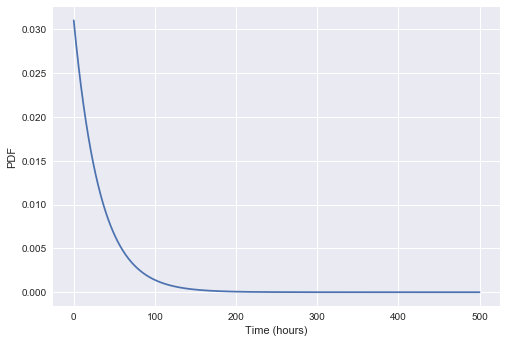

In [293]:
#Probability density function
time2 = np.linspace(0, 500, num=1000)
y2_pdf = stats.gamma.pdf(time2, a=a2, loc=0, scale=rate2)
plt.xlabel("Time (hours)")
plt.ylabel("PDF")
plt.plot(time2, y2_pdf)

In [249]:
print("Report:")
print("Mean:", gamma.mean(a2, loc=0, scale=rate2))
print("Median:", gamma.median(a2, loc=0, scale=rate2))
print("StD:", gamma.std(a2, loc=0, scale=rate2))
print("Var:", gamma.var(a2, loc=0, scale=rate2))
print("Intervals (90%):", gamma.interval([0.9], a2, loc=0, scale=rate2))

Report:
Mean: 32.25806451612903
Median: 22.359586469675662
StD: 32.25806451612903
Var: 1040.5827263267429
Intervals (90%): (array([1.6546224]), array([96.63652495]))


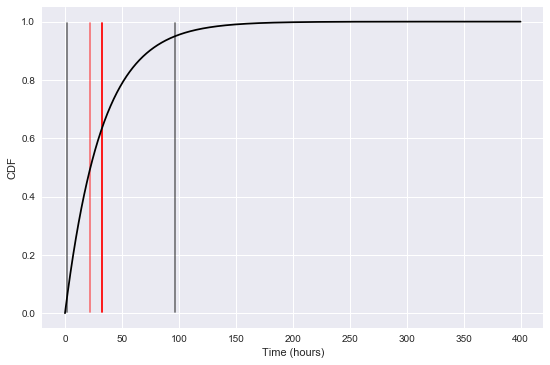

In [336]:
#Cumulative distribution function
#plt.figure(figsize=(3, 3))
time2 = np.linspace(0, 400, num=1000)
y2_cdf = gamma.cdf(time2, a2, loc=0, scale=rate2)
plt.axvline(32.26, 0.05,0.95, color="red") # Mean
plt.axvline(22.36, 0.05,0.95, color="red", alpha=0.5) # Median
plt.axvline(1.65, 0.05,0.95, color="black", alpha=0.5) # CI, lower 
plt.axvline(96.6, 0.05,0.95, color="black", alpha=0.5) # CI, upper
plt.xlabel("Time (hours)")
plt.ylabel("CDF")
plt.plot(time2, y2_cdf, color="black")

In [384]:
# #Fig for manuscript (Time in days)

# plt.figure(figsize=(5, 5))
# y1_cdf = gamma.cdf(time2, a2, loc=0, scale=rate2)
# plt.axvline(32.26/24, 0.01,0.99, color="red") # Mean
# plt.axvline(22.36/24, 0.01,0.99, color="red", alpha=0.5) # Median
# plt.axvline(1.65/24, 0.01,0.99, color="black", alpha=0.5) # CI, lower 
# plt.axvline(96.6/24, 0.01,0.99, color="black", alpha=0.5) # CI, upper
# plt.xlabel("Time (days)")
# plt.ylabel("CDF")
# plt.plot(time2/24, y1_cdf, color="black")
# plt.tight_layout()
# plt.minorticks_on()
# plt.axis([-0.3, 10, 0, 1.1])
# plt.savefig('CDF_after.svg', transparent=True)